In [1]:
import pandas as pd
import os

In [2]:
files = os.listdir("results/")
files = [f for f in files if f.startswith("results")]

for fname in files:
    print(fname)
    with open("results/" + fname, "r") as f:
        lines = f.read()
    lines = lines.replace("-", "")
    lines = lines.split("\n")
    lines = lines[2:]
    recs = []
    sens = []
    positive_pred = []
    der = []

    for i, line in enumerate(lines):
        print(line)
        if len(line) == 0:
            continue
        
        try:
            data = line.split(": ")[1].replace("%", "")
        except:
            continue
        if i % 4 == 0:
            sens.append(data)
        elif i % 4 == 1:
            positive_pred.append(data)
        else:
            der.append(data)
            

            
    df = pd.DataFrame({"Sensitivity": [float(s) for s in sens], "Positive Predictive Value": [float(p) for p in positive_pred], "DER": [float(d) for d in der]})
    print(df)
    df.to_csv("gridsearch_csv/" + fname + ".csv", index=False)
    

results_0.0001_0.0001_0.001.txt
Sensitivity (SE): 100.00%
Positive Prediction (+P): 99.69%
Detection Error Rate (DER): 0.308%

Sensitivity (SE): 99.68%
Positive Prediction (+P): 99.52%
Detection Error Rate (DER): 0.801%

Sensitivity (SE): 96.94%
Positive Prediction (+P): 90.96%
Detection Error Rate (DER): 12.688%

Sensitivity (SE): 99.71%
Positive Prediction (+P): 99.43%
Detection Error Rate (DER): 0.861%

Sensitivity (SE): 87.32%
Positive Prediction (+P): 87.47%
Detection Error Rate (DER): 25.195%

Sensitivity (SE): 94.09%
Positive Prediction (+P): 95.22%
Detection Error Rate (DER): 10.632%

Sensitivity (SE): 81.21%
Positive Prediction (+P): 79.21%
Detection Error Rate (DER): 40.105%

Sensitivity (SE): 98.18%
Positive Prediction (+P): 90.79%
Detection Error Rate (DER): 11.781%

Sensitivity (SE): 41.36%
Positive Prediction (+P): 33.26%
Detection Error Rate (DER): 141.635%

Sensitivity (SE): 54.06%
Positive Prediction (+P): 49.48%
Detection Error Rate (DER): 101.144%

Sensitivity (SE): 

In [3]:
# with open("results_1e-05_0.0001_0.05.txt", "r") as f:
#         lines = f.read()
# lines = lines.replace("-", "")
# lines = lines.split("\n")
# lines = lines[2:]
# recs = []
# sens = []
# positive_pred = []
# der = []

# for i, line in enumerate(lines):
#     print(line)
#     if len(line) == 0:
#         continue
#     data = line.split(": ")[1].replace("%", "")
#     print(data)
#     if i % 4 == 0:
#         sens.append(data)
#     elif i % 4 == 1:
#         positive_pred.append(data)
#     else:
#         der.append(data)
        

            
# df = pd.DataFrame({"Sensitivity": [float(s) for s in sens], "Positive Predictive Value": [float(p) for p in positive_pred], "DER": [float(d) for d in der]})

In [4]:
df

,Sensitivity,Positive Predictive Value,DER
0,100.00,99.69,0.308
1,99.68,99.52,0.801
2,96.94,90.96,12.688
3,99.71,99.43,0.861
4,87.32,87.47,25.195
5,94.09,95.22,10.632
6,81.21,79.21,40.105
7,98.18,90.79,11.781
8,41.36,33.26,141.635
9,54.06,49.48,101.144


In [5]:
params = []
means_spec, stds_spec = [], []
means_sens, stds_sens = [], []
means_der, stds_der = [], []

In [6]:
for fp in os.listdir("gridsearch_csv/"):
    df = pd.read_csv("gridsearch_csv/" + fp)
    beta1 = float(fp.split("_")[1])
    beta2 = float(fp.split("_")[2])
    print(".".join(fp.split("_")[-1].split(".")[:-2]))
    T = float(".".join(fp.split("_")[-1].split(".")[:-2]))
    params.append((beta1, beta2, T))
    
    means_sens.append(df["Sensitivity"].mean())
    stds_sens.append(df["Sensitivity"].std())
    
    means_der.append(df["DER"].mean())
    stds_der.append(df["DER"].std())
    
    means_spec.append(df["Positive Predictive Value"].mean())
    stds_spec.append(df["Positive Predictive Value"].std())
    
    # for i, (a, b) in enumerate(zip(df.select_dtypes(include=['float64']).mean(), df.select_dtypes(include=['float64']).std())):
        # print(f"{df.columns[i]}:  {a:.2f} ± {b:.2f}")
        # means.append(a)
        # stds.append(b)


0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.005
0.01
0.05
0.1
0.5
0.001
0.00

In [7]:
df = pd.DataFrame({
    "Beta 1": [p[0] for p in params],
    "Beta 2": [p[1] for p in params],
    "T": [p[2] for p in params],
    "Specificity Mean": means_spec,
    "Specificity Std": stds_spec,
    "Sensitivity Mean": means_sens,
    "Sensitivity Std": stds_sens,
    "DER Mean": means_der,
    "DER Std": stds_der
})

In [8]:
df.to_csv("gridsearch_results.csv", index=False)

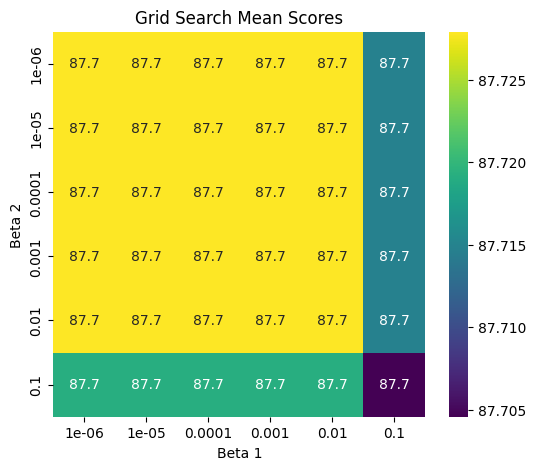

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Extract unique parameter values
param1 = sorted(set([p[0] for p in params]))  # Unique values for param1
param2 = sorted(set([p[1] for p in params]))  # Unique values for param2

# Initialize a 4x4 matrix
heatmap_data = np.full((len(param1), len(param2)), np.nan)

# Fill the matrix with mean scores
for (p1, p2, _), mean in zip(params, means_sens):
    i = param1.index(p1)  # Find the index of param1 value
    j = param2.index(p2)  # Find the index of param2 value
    heatmap_data[i, j] = mean  # Assign the corresponding mean score

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="viridis",
    xticklabels=param2, yticklabels=param1
)
plt.xlabel("Beta 1")
plt.ylabel("Beta 2")
plt.title("Grid Search Mean Scores")
plt.show()


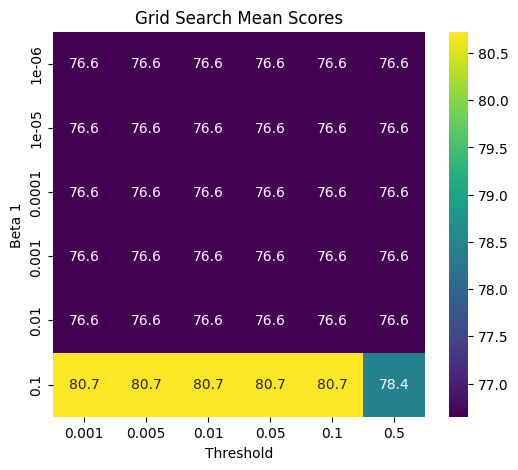

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Extract unique parameter values
param1 = sorted(set([p[0] for p in params]))  # Unique values for param1
param2 = sorted(set([p[2] for p in params]))  # Unique values for param2

# Initialize a 4x4 matrix
heatmap_data = np.full((len(param1), len(param2)), np.nan)

# Fill the matrix with mean scores
for (p1, _, p3), mean in zip(params, means_spec):
    i = param1.index(p1)  # Find the index of param1 value
    j = param2.index(p3)  # Find the index of param2 value
    heatmap_data[i, j] = mean  # Assign the corresponding mean score

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="viridis",
    xticklabels=param2, yticklabels=param1
)
plt.xlabel("Threshold")
plt.ylabel("Beta 1")
plt.title("Grid Search Mean Scores")
plt.show()


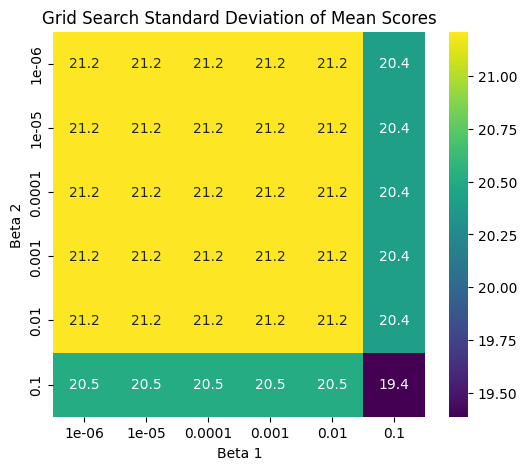

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Extract unique parameter values
param1 = sorted(set([p[0] for p in params]))  # Unique values for param1
param2 = sorted(set([p[1] for p in params]))  # Unique values for param2

# Initialize a 4x4 matrix
heatmap_data = np.full((len(param1), len(param2)), np.nan)

# Fill the matrix with mean scores
for (p1, p2, _), std in zip(params, stds_spec):
    i = param1.index(p1)  # Find the index of param1 value
    j = param2.index(p2)  # Find the index of param2 value
    heatmap_data[i, j] = std  # Assign the corresponding mean score

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="viridis",
    xticklabels=param2, yticklabels=param1
)
plt.xlabel("Beta 1")
plt.ylabel("Beta 2")
plt.title("Grid Search Standard Deviation of Mean Scores")
plt.show()


In [13]:
best_params = [1e-5, 1e-5, 0.01]

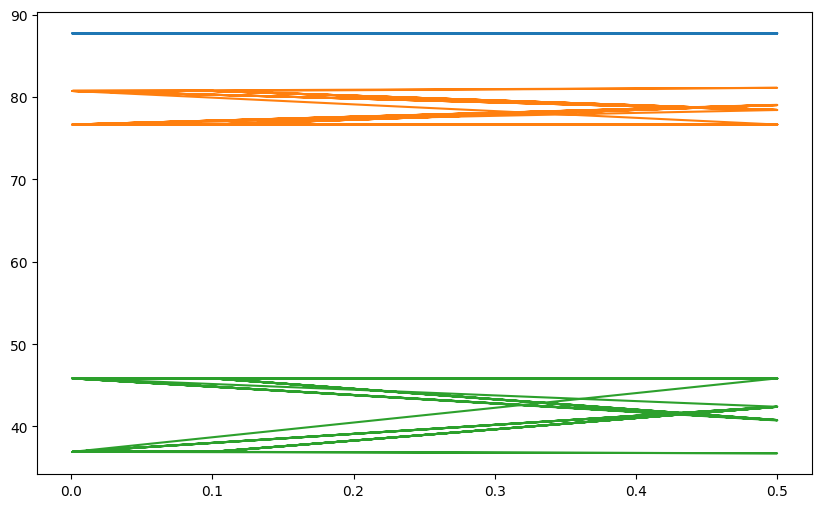

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df["T"], df["Sensitivity Mean"], label="Sensitivity")
plt.plot(df["T"], df["Specificity Mean"], label="Specificity")
plt.plot(df["T"], df["DER Mean"], label="DER")

<Axes: >

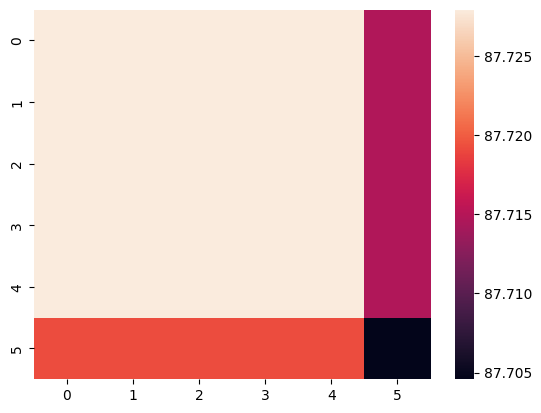

In [15]:
# Create a heatmap for the best parameters
# Axis 1 = Beta 1
# Axis 2 = Beta 2
# Score = Sensitivity
heatmap_data = np.full((len(param1), len(param2)), np.nan)

for p1, p2, mean in zip(df["Beta 1"], df["Beta 2"], df["Sensitivity Mean"]):
    i = param1.index(p1)  # Find the index of param1 value
    j = param2.index(p2)  # Find the index of param2 value
    heatmap_data[i, j] = mean  # Assign the corresponding mean score

import seaborn as sns

sns.heatmap(heatmap_data)


In [16]:
df["Sensitivity Mean"].idxmax(), df["Specificity Mean"].idxmax(), df["DER Mean"].idxmin()           

df.iloc[0]
df.iloc[131]

Beta 1               0.100000
Beta 2               0.100000
T                    0.500000
Specificity Mean    81.105833
Specificity Std     19.386846
Sensitivity Mean    87.704583
Sensitivity Std     16.285046
DER Mean            36.748708
DER Std             43.614782
Name: 131, dtype: float64

In [17]:
df["Combined"] = (df["Sensitivity Mean"] + df["Specificity Mean"]) / 2 
df["Combined"].idxmax()

131

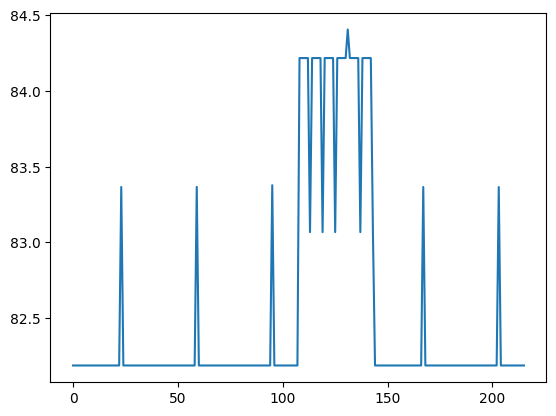

In [18]:
plt.plot(df["Combined"])

Text(0.5, 0, 'Parameter Set Index')

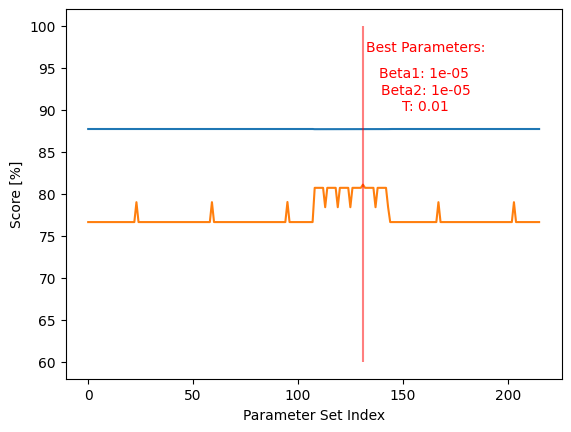

In [19]:
plt.plot(df["Sensitivity Mean"])
plt.plot(df["Specificity Mean"])
plt.vlines(131, ymin=60, ymax=100, color="red", alpha=.5)
plt.text(161, 97, "Best Parameters:", color="red", ha="center")
plt.text(161, 90, f"Beta1: {best_params[0]} \nBeta2: {best_params[1]}\nT: {best_params[2]:.2f}", color="red", ha="center")
plt.ylabel("Score [%]")
plt.xlabel("Parameter Set Index")


In [24]:
float(1e-5)

1e-05

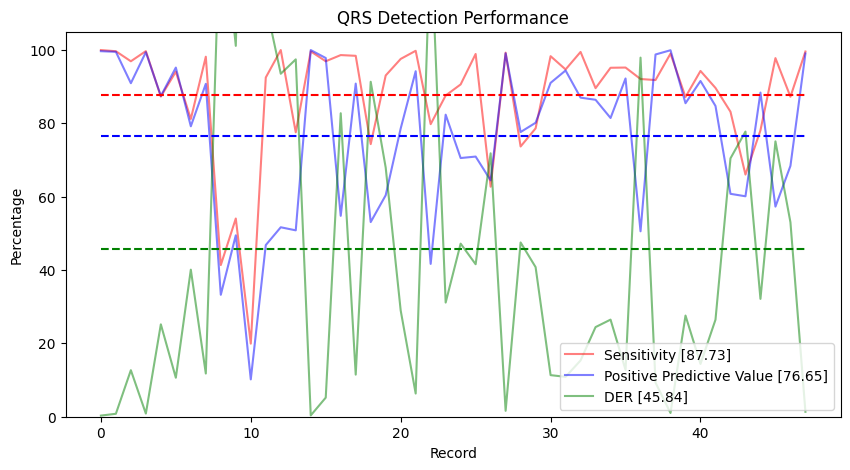

In [34]:
import matplotlib.pyplot as plt

# df = pd.read_csv("gridsearch_csv/results_1e-05_1e-05_0.01.txt.csv")
df = pd.read_csv("gridsearch_csv/results_0.01_0.01_0.01.txt.csv")

plt.figure(figsize=(10,5))
plt.plot(df["Sensitivity"], label=f"Sensitivity [{df['Sensitivity'].mean():.2f}]", c="r", alpha=0.5)
plt.plot(df["Positive Predictive Value"], label=f"Positive Predictive Value [{df['Positive Predictive Value'].mean():.2f}]", c="b", alpha=0.5)
plt.plot(df["DER"], label=f"DER [{df['DER'].mean():.2f}]", c="g", alpha=0.5)
plt.ylim(0, 105)
plt.title("QRS Detection Performance")
plt.xlabel("Record")
plt.ylabel("Percentage")
plt.plot([df["Sensitivity"].mean()] * len(df), c="r",  linestyle="--")
plt.plot([df["Positive Predictive Value"].mean()] * len(df), c="b" , linestyle="--")
plt.plot([df["DER"].mean()] * len(df), c="g",  linestyle="--")
plt.legend()